# Reading The Data
-------------------------------------------

In [1]:
import pandas as pd
stroke_data = pd.read_csv('../Data/healthcare-dataset-stroke-data.csv')

# Exploring The Data
------------------------------------

### DATA SAMPLES

In [ ]:
print('Dataset Samples (head): ')
stroke_data.head()

Dataset Samples (head): 


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
print('Dataset Samples (tail): ')
stroke_data.tail()

Dataset Samples (tail): 


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


### EXPLORING THE STRUCTRUE

 The dataset used in this project is contained in a single CSV file named healthcare-dataset-stroke-data.csv. It consists of 5110 rows and 12 columns, including both numerical and categorical attributes that describe patients’ demographic, lifestyle, and health-related information.

 After analyzing the dataset, we found that there are no duplicate records in the table. Among the numerical attributes, missing values were present only in the bmi column, while all other numerical columns were complete. For the categorical attributes, an inspection of the unique values in each column showed no inconsistencies or unexpected entries, indicating that the categorical data is clean and well-structured.



In [ ]:
print('Dataset Information: ')
stroke_data.info()

print('\n========================================================================================')
print('Dataset Shape: ')
print(stroke_data.shape)

print('\n========================================================================================')
print('Dataset Columns: ')
print(stroke_data.columns)

print('\n========================================================================================')
print('Dataset Columns Data types: ')
print(stroke_data.dtypes)

print('\n========================================================================================')
print('Dataset Missing Values: ')
print(stroke_data.isna().sum())

print('\n========================================================================================')
print('Dataset Duplicate Rows: ')
print(stroke_data.duplicated().sum())

print('\n========================================================================================')
for column in stroke_data.select_dtypes(include='object'):
    print(f"\nColumn: {column}")
    print(stroke_data[column].unique())
    print('-'*50)

Dataset Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB

Dataset Shape: 
(5110, 12)

Dataset Columns: 
Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'w

### EXPLORING THE STATISTICS

In [7]:
print('Dataset Description: ')
stroke_data.describe()

Dataset Description: 


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


##### Outlier Identification
  Outlier detection was performed to identify unusual data points that could influence the statistical analysis or affect the performance of predictive models. 

  However, not all numerical columns in the dataset are suitable for this analysis. Columns such as id, hypertension, heart_disease, and stroke contain identifiers or binary values (0 and 1), where outliers have no practical meaning. Therefore, we limited our examination to the three continuous variables: age, avg_glucose_level, and bmi.

  The Interquartile Range (IQR) method was applied to these columns to detect statistical outliers. This approach identifies values that lie below the first quartile (Q1) minus 1.5 times the IQR, or above the third quartile (Q3) plus 1.5 times the IQR. The following table summarizes the number of outliers found in each

 (Boxplots were also generated to visually represent these outliers and their relation to stroke occurrence.)

  From the visualizations, we observed that the avg_glucose_level and bmi features contained noticeable outliers, while age showed a more evenly distributed range of values. These detected outliers will be considered carefully in later stages, as they might represent true extreme cases rather than data entry errors.


Outlier count using the IQR method:

age: 0 outliers
avg_glucose_level: 627 outliers
bmi: 110 outliers


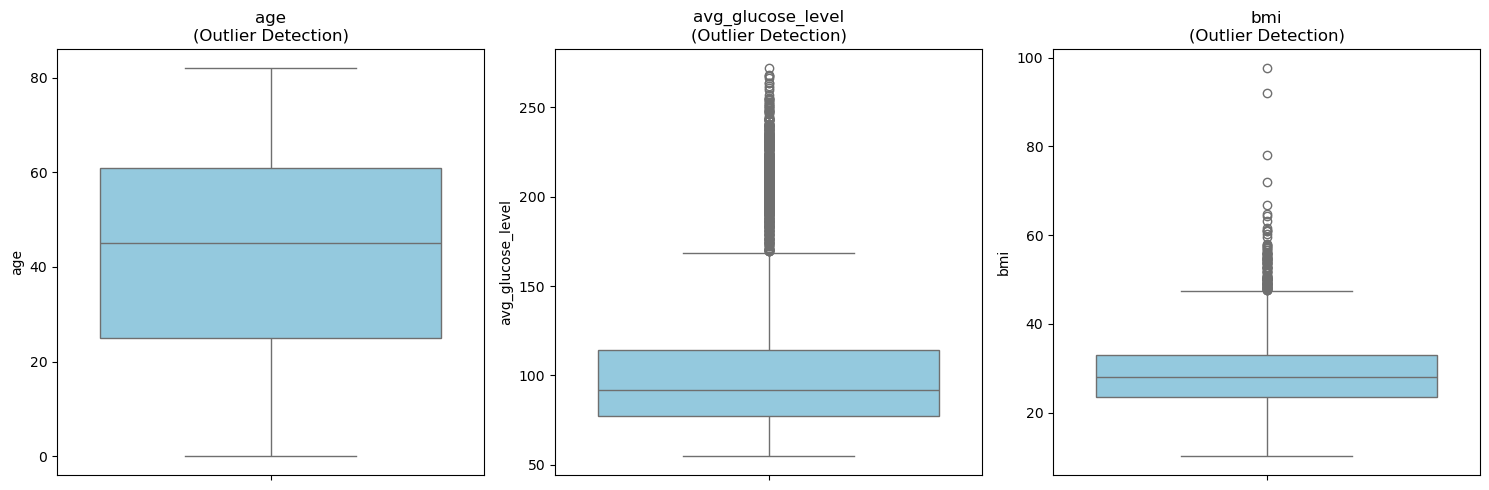

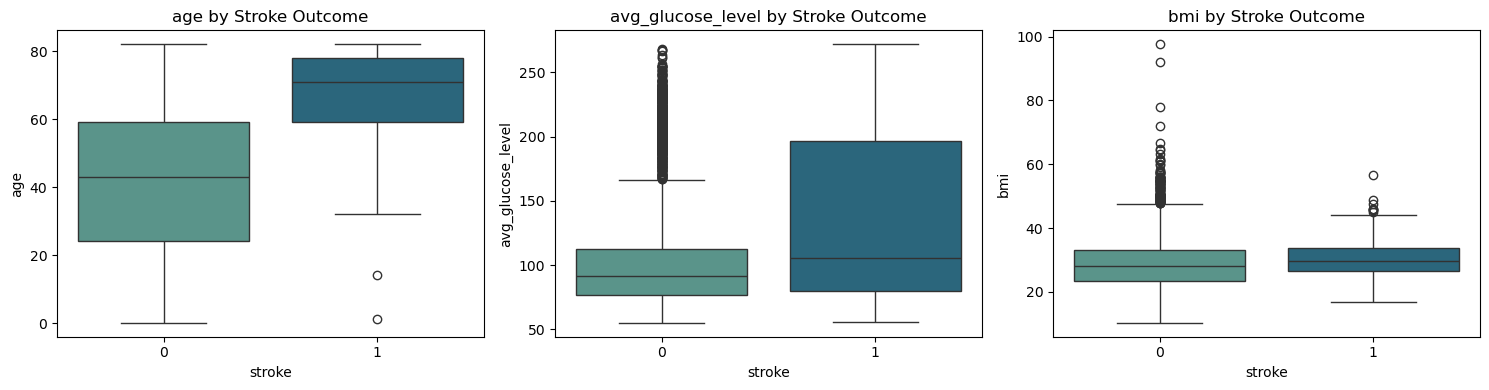

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only the valid numeric columns for outlier detection
valid_numeric_cols = ['age', 'avg_glucose_level', 'bmi']


# STATISTICAL METHOD (IQR)
# ----------------------------------------------------------
print("Outlier count using the IQR method:\n")

for col in valid_numeric_cols:
    Q1 = stroke_data[col].quantile(0.25)
    Q3 = stroke_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = stroke_data[(stroke_data[col] < lower_bound) | (stroke_data[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")


# VISUAL METHOD (BOXPLOTS)
# ----------------------------------------------------------
plt.figure(figsize=(15, 5))
for i, col in enumerate(valid_numeric_cols, 1):
    plt.subplot(1, len(valid_numeric_cols), i)
    sns.boxplot(y=stroke_data[col], color='skyblue')
    plt.title(f"{col}\n(Outlier Detection)")
plt.tight_layout()
plt.show()


# VISUALIZE OUTLIERS BY STROKE OUTCOME
# ----------------------------------------------------------
plt.figure(figsize=(15, 4))
for i, col in enumerate(valid_numeric_cols, 1):
    plt.subplot(1, len(valid_numeric_cols), i)
    sns.boxplot(
        x='stroke',
        y=col,
        data=stroke_data,
        hue='stroke',
        palette='crest',
        legend=False
    )
    plt.title(f"{col} by Stroke Outcome")
plt.tight_layout()
plt.show()




##### Identifying Key Features

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Make a copy to preserve the original data
stroke_data_encoded = stroke_data.copy()

# ----------------------------------------
# ENCODE CATEGORICAL FEATURES
# ----------------------------------------
encoder = LabelEncoder()
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for col in categorical_cols:
    stroke_data_encoded[col] = encoder.fit_transform(stroke_data_encoded[col].astype(str))


# ----------------------------------------
# COMPUTE CORRELATION MATRIX
# ----------------------------------------
corr_matrix = stroke_data_encoded.corr()

# Extract correlations with the target column
corr_with_stroke = corr_matrix['stroke'].sort_values(ascending=False)
print("Correlation of all features with 'stroke':\n")
print(corr_with_stroke)


# ----------------------------------------
# VISUALIZE
# ----------------------------------------
plt.figure(figsize=(10, 6))
plt.title("Correlation Heatmap (After Encoding)")
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


# ----------------------------------------
# CREATE A SUMMARY TABLE
# ----------------------------------------
summary_df = pd.DataFrame({
    'Feature': corr_with_stroke.index,
    'Correlation_with_stroke': corr_with_stroke.values
}).reset_index(drop=True)

# Mark feature types (numeric vs categorical)
numeric_cols = stroke_data.select_dtypes(include=['int64', 'float64']).columns
summary_df['Type'] = summary_df['Feature'].apply(lambda x: 'Numeric' if x in numeric_cols else 'Categorical')

# Display combined summary
print("\nFeature Correlation Summary:\n")
print(summary_df)


# ----------------------------------------
# VISUALIZE TOP 5 FEATURES
# ----------------------------------------

top_features = corr_with_stroke.drop('stroke').head(5)

plt.figure(figsize=(8,5))
sns.barplot(
    x=top_features.values,
    y=top_features.index,
    hue=top_features.index,
    palette='crest',
    legend=False
)
plt.title("Top 5 Features Most Correlated with Stroke")
plt.xlabel("Correlation with Stroke")
plt.ylabel("Feature")
plt.show()



After encoding all categorical variables, we computed correlations between each feature and the target variable, stroke. Statistically, age showed the strongest positive correlation, indicating that older individuals are more prone to strokes. This aligns with established medical knowledge, as age is one of the most significant risk factors for cerebrovascular disease.

Average glucose level and hypertension also exhibited moderate positive correlations, suggesting that individuals with higher glucose levels or a history of high blood pressure have an elevated likelihood of experiencing a stroke — consistent with the known link between diabetes, hypertension, and vascular damage.

Meanwhile, features like heart disease and ever being married showed weaker statistical correlations but retain clinical importance. Cardiovascular conditions often coexist with stroke risk, and marital status can indirectly reflect lifestyle and stress-related factors influencing health outcomes.

Although features such as work type, residence type, and smoking status showed relatively low correlation values, they will be retained for modeling since they may still capture subtle or combined effects that correlation alone cannot reveal.

Overall, the correlation analysis not only confirms expected medical relationships but also supports the inclusion of multiple variables to ensure a holistic predictive model for stroke risk.

In [ ]:
#-----------------------------------------------------------------
# DISTRIBUTION OF HEALTH-RELATED DATA POINTS
#-----------------------------------------------------------------

# Numeric
numeric_cols = ['age', 'avg_glucose_level', 'bmi']

plt.figure(figsize=(15, 4))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, len(numeric_cols), i)
    sns.histplot(stroke_data[col], kde=True, color='teal')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

In [ ]:
# Categorical
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

plt.figure(figsize=(15, 8))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(
        x=col,
        data=stroke_data,
        hue=col,
        palette='crest',
        legend=False
    )
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


In [ ]:
#-----------------------------------------------------------------
# POTENTIAL PATTERNS
#-----------------------------------------------------------------

# 1️⃣ Does stroke risk rise with age?
sns.boxplot(
    x='stroke',
    y='age',
    data=stroke_data,
    hue='stroke',
    palette='crest',
    legend=False
)
plt.title("Age vs Stroke Occurrence")
plt.show()

# 2️⃣ Is high glucose linked to stroke?
sns.boxplot(
    x='stroke',
    y='avg_glucose_level',
    data=stroke_data,
    hue='stroke',
    palette='crest',
    legend=False
)
plt.title("Average Glucose Level vs Stroke Occurrence")
plt.show()

# 3️⃣ Is smoking or work type related to stroke?
sns.countplot(
    x='smoking_status',
    hue='stroke',
    data=stroke_data,
    palette='crest'
)
plt.title("Smoking Status vs Stroke Occurrence")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()




# Data Cleaning

In [ ]:
# Check median BMI
median_bmi = stroke_data['bmi'].median()
print("Median BMI:", median_bmi)

# Fill missing BMI values
stroke_data['bmi'].fillna(median_bmi, inplace=True)

# Verify no missing values remain
stroke_data.isna().sum()

The dataset contained missing values exclusively in the BMI column (approximately 201 records). Since removing these entries would result in unnecessary data loss, we applied median imputation to fill the missing values. The median value of BMI was chosen over the mean because it is less affected by outliers and better represents the central tendency of the data.

This approach ensures that the overall distribution of BMI remains realistic while preserving all patient records for subsequent modeling. After imputation, no missing values remained in the dataset, confirming that it is now complete and ready for normalization and encoding in the next preprocessing steps.

In [ ]:
# Check the extreme values for glucose and BMI
print("Glucose Range:", stroke_data['avg_glucose_level'].min(), "to", stroke_data['avg_glucose_level'].max())
print("BMI Range:", stroke_data['bmi'].min(), "to", stroke_data['bmi'].max())

In [ ]:
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower_bound, upper_bound)

# Apply capping only to relevant columns
cap_outliers(stroke_data, 'avg_glucose_level')
cap_outliers(stroke_data, 'bmi')

# Verify
stroke_data[['avg_glucose_level', 'bmi']].describe()


Outlier analysis revealed extreme values in the average glucose level and BMI features, which are expected in healthcare data due to patient variability. Binary variables such as hypertension and heart_disease were initially flagged by the IQR method but were excluded from treatment since they contain only 0 and 1 values.

To prevent extreme numerical values from disproportionately influencing the model while preserving clinical validity, the continuous features were treated using IQR-based capping. Values exceeding the upper or lower thresholds were replaced with the nearest valid boundary. This approach maintains the integrity of the dataset while ensuring a more stable distribution for predictive modeling.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select numeric columns to scale
numeric_features = ['age', 'avg_glucose_level', 'bmi']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
stroke_data[numeric_features] = scaler.fit_transform(stroke_data[numeric_features])

# Verify results
stroke_data[numeric_features].describe().T


To ensure feature comparability and improve model performance, all continuous variables (age, average glucose level, and BMI) were standardized using the Z-score normalization technique. This process rescales values to have a mean of 0 and a standard deviation of 1, allowing machine learning algorithms to interpret each feature on the same scale.

Standardization was preferred over simple normalization because the distributions of health-related features are approximately bell-shaped and include outliers that are better handled under a standardized scale. This step ensures the dataset is numerically stable and ready for model training.

In [ ]:
encoder = LabelEncoder()

stroke_data['ever_married'] = encoder.fit_transform(stroke_data['ever_married'])

stroke_data['ever_married'] = stroke_data['ever_married'].map({'No': 0, 'Yes': 1})

stroke_data['ever_married'].value_counts()


To ensure model compatibility, categorical variables were reviewed for encoding needs. Since most features were already numerical or binary, only the ‘ever_married’ column required transformation. The values were encoded as 0 = No and 1 = Yes using label encoding. This maintains the dataset’s simplicity while ensuring that marital status — a known socioeconomic and health factor — can be quantitatively utilized in the predictive model.

Multi-category features such as work type and smoking status were left unencoded at this stage to prevent unnecessary dimensional expansion. They can be encoded later if required during the modeling phase.